In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import transforms, models
import matplotlib.pyplot as plt
import numpy as np
from fastai.vision.all import *

In [2]:
# Define preprocessing and augmentation for train data
train_transform = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.RandomHorizontalFlip(), 
    transforms.RandomRotation(15),
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2),
    transforms.ToTensor(),
    transforms.Normalize(
        mean=[0.485, 0.456, 0.406],
        std=[0.229, 0.224, 0.225]
    )

])



In [3]:
# Define validation transformation with no augmentation
val_transform = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(
        mean=[0.485, 0.456, 0.406],
        std=[0.229, 0.224, 0.225]
    )
])


In [4]:
import os
from dotenv import load_dotenv
from torchvision import datasets

# Load environment variables from the .env file
load_dotenv() 
# load dataset
PATH = os.getenv("DATASET_PATH")
if PATH is None:
    raise ValueError("DATASET_PATH environment variable not set. Check your .env file.")

dataset = datasets.ImageFolder(PATH, transform=train_transform)

In [5]:
from torch.utils.data import random_split
# split data into train and validation
train_size = int(0.8 * len(dataset))
val_size = len(dataset) - train_size
train_dataset, val_dataset = random_split(dataset, [train_size, val_size])

In [ ]:
#apply transform to validation dataset
val_dataset.dataset.transform = val_transform


In [7]:
# Dataloaders
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)

In [8]:
print("Classes:", dataset.classes)
print("Class indices:", dataset.class_to_idx)

Classes: ['Backpack', 'Chair', 'File_Cabinet', 'Folder', 'Laptop', 'Mug', 'Notebook', 'Pen', 'Table', 'Trash_Can']
Class indices: {'Backpack': 0, 'Chair': 1, 'File_Cabinet': 2, 'Folder': 3, 'Laptop': 4, 'Mug': 5, 'Notebook': 6, 'Pen': 7, 'Table': 8, 'Trash_Can': 9}


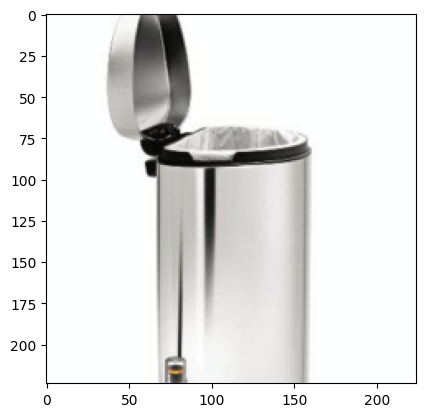

In [9]:
# display image
def imshow(img):
    img = img.numpy().transpose((1, 2, 0))
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    img = std * img + mean  # unnormalize
    img = np.clip(img, 0, 1)
    plt.imshow(img)
    plt.show()

# Show one batch
images, labels = next(iter(train_loader))
imshow(images[2])

SuggestedLRs(valley=0.0020892962347716093)

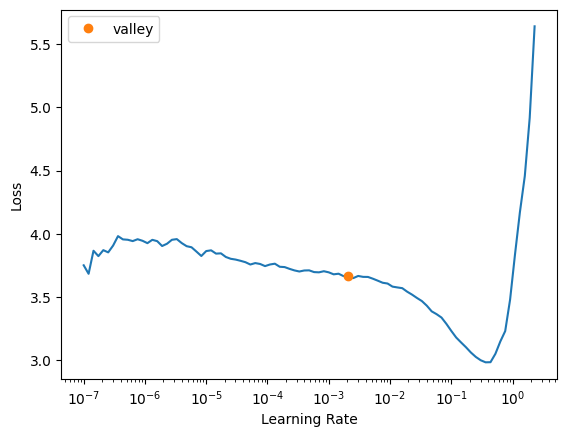

In [10]:
#finding learning rate of resnet34
from fastai.data.core import DataLoaders
dls = DataLoaders.from_dsets(train_dataset, val_dataset, bs=32, device='cpu')
dls.c = 10
learn = vision_learner(dls, resnet34, metrics=accuracy, loss_func=CrossEntropyLossFlat(),opt_func=SGD)


learn.lr_find()

Take the learning rate before the loss sharply increases so, taking learning rate of 10**-3/1e-3 

In [ ]:
# freeze petrained layers
learn.freeze()

# train head for r epoch with learning rate of 1e-3
learn.fit_one_cycle(5, 3e-3)

epoch,train_loss,valid_loss,accuracy,time
0,3.471447,2.412455,0.183019,06:22
1,2.981042,1.969280,0.313208,05:34
2,2.758255,1.903655,0.330189,05:46


In [17]:
# Assuming 'train_dataset' is the Subset object
original_imagefolder = train_dataset.dataset

# Now, access the classes attribute from the original object
class_names = original_imagefolder.classes 

print("Classes found:", class_names)
print("Number of classes:", len(class_names))

Classes found: ['Backpack', 'Chair', 'File_Cabinet', 'Folder', 'Laptop', 'Mug', 'Notebook', 'Pen', 'Table', 'Trash_Can']
Number of classes: 10


AttributeError: 'Tensor' object has no attribute 'show'